# Load the data

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("features_built.csv")#the original dataframe

In [8]:
data = data[data["score"]==1]

In [9]:
data

,Unnamed: 0,question_cleaned,answer_cleaned,score,cos_sim,kl_lm,kl_bilm,Question,Answer,score.1,tf_cos,bitf_cos
0,0,"['please', 'describe', 'size', 'organization',...","['clifford', 'chance', 'employ', 'people', 'gl...",1.0,0.857279,5.285982,64.202174,1) Please describe \n- the size of the organiz...,"Clifford Chance employs 6000 people globally, ...",1.0,0.501237,0.386223
1,1,"['please', 'provide', 'clear', 'explanation', ...","['clifford', 'chance', 'professional', 'legal'...",1.0,0.788003,10.015840,65.480876,2) Please provide a clear explanation of what ...,Clifford Chance is a professional legal servic...,1.0,0.150290,0.142950
2,2,"['office', 'upper', 'bank', 'street', 'london'...","['citi', 'data', 'handle', 'aforementioned', '...",1.0,0.928840,10.666567,161.406301,"3) Are this office at 10 UPPER BANK STREET, LO...",Citi data is only handled at the aforementione...,1.0,0.132648,0.110987
3,3,"['specify', 'quantity', 'describe', 'number', ...","['record', 'quantity', 'determine', 'relations...",1.0,0.835440,10.341471,99.324364,\n4) Specify quantities that will describe the...,Record quantity is determined by the relations...,1.0,0.025156,0.008706
4,4,"['one', 'sub', 'contractor', 'use', 'provide',...","['sub', 'contractor', 'use', 'conjunction', 's...",1.0,0.935458,7.693669,52.343010,5) If one or more sub-contractors are used in ...,Sub-contractors are not used in conjunction wi...,1.0,0.407978,0.389921
5,5,"['describe', 'flow', 'data', 'time', 'leaf', '...",['applicable'],1.0,0.879430,14.394304,98.652599,1) Describe the flow of data from the time it ...,not applicable,1.0,0.000000,0.000000
6,6,"['data', 'access', 'describe', 'access']","['data', 'access', 'use', 'standard', 'tool', ...",1.0,0.908623,5.971332,13.194141,"a) If data is accessed, describe how it is acc...",a.) Data is accessed using standard tools and ...,1.0,0.385104,0.304514
7,7,"['b', 'data', 'process', 'describe', 'process'...","['b', 'data', 'process', 'line', 'contract', '...",1.0,0.766480,6.713709,22.141579,"b) If data is processed, describe the process ...",b.) Data is processed in line with contract sc...,1.0,0.202224,0.204875
8,8,"['c', 'data', 'store', 'describe', 'store', 't...","['c', 'data', 'store', 'secure', 'server', 'wi...",1.0,0.820671,8.477222,26.565757,"c) If data is stored, describe how it is store...",c.) Data is stored on secure servers within a ...,1.0,0.179725,0.090011
9,9,"['describe', 'data', 'disposal', 'process']","['asset', 'information', 'disposal', 'cover', ...",1.0,0.836580,5.080876,13.646755,d) Describe the data disposal process.,d.) Asset and Information Disposal is covered ...,1.0,0.413751,0.295674


In [10]:
qadata = data[["Question", "Answer"]]#select the questions and answers

In [11]:
qadata.fillna('not applicable', inplace = True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [12]:
import random

In [13]:
questions = qadata[["Question"]]#all the questions

In [14]:
answers = qadata[["Answer"]]#all the answes

In [15]:
qadata["score"] = 1.0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
wrong_ans = answers.sample(frac = 1).reset_index(drop = True)#wrong answers generated by shuffle

In [17]:
qadata_wrong = pd.concat([questions, wrong_ans], axis = 1)#the wrong part of the data

In [18]:
qadata_right = qadata#the right part of the data

In [19]:
qadata_wrong["score"] = 0.0

In [20]:
qadata = pd.concat([qadata_right, qadata_wrong], ignore_index = True)#the new generated dataset with labels

In [21]:
qadata

,Question,Answer,score
0,1) Please describe \n- the size of the organiz...,"Clifford Chance employs 6000 people globally, ...",1.0
1,2) Please provide a clear explanation of what ...,Clifford Chance is a professional legal servic...,1.0
2,"3) Are this office at 10 UPPER BANK STREET, LO...",Citi data is only handled at the aforementione...,1.0
3,\n4) Specify quantities that will describe the...,Record quantity is determined by the relations...,1.0
4,5) If one or more sub-contractors are used in ...,Sub-contractors are not used in conjunction wi...,1.0
5,1) Describe the flow of data from the time it ...,not applicable,1.0
6,"a) If data is accessed, describe how it is acc...",a.) Data is accessed using standard tools and ...,1.0
7,"b) If data is processed, describe the process ...",b.) Data is processed in line with contract sc...,1.0
8,"c) If data is stored, describe how it is store...",c.) Data is stored on secure servers within a ...,1.0
9,d) Describe the data disposal process.,d.) Asset and Information Disposal is covered ...,1.0


# Preprocessing

In [22]:
import re
import nltk
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords,wordnet
stopWords = set(stopwords.words('english'))

In [23]:
def wordcleaning(text):
    """
    clean the data from raw text to list of cleaned words
    text: the raw text to be cleaned
    cleaned: the cleaned list of words
    """
    cleaned = []
    cleaned = re.sub("[^a-zA-Z]", " ",str(text))
    
    cleaned = word_tokenize(cleaned)
    
    lem = WordNetLemmatizer()
    for i in range(len(cleaned)):
        word = cleaned[i]
        new_word  = lem.lemmatize(word)
        new_word  = lem.lemmatize(new_word,'v')
        new_word  = lem.lemmatize(new_word,'a')
        new_word  = lem.lemmatize(new_word,'r').lower()
        cleaned[i] = new_word
    
    cleaned = [word for word in cleaned if word not in stopWords]
    return cleaned

In [24]:
clean_all = qadata.copy()#the dataset after cleaning

In [25]:
clean_all['Question'] = [wordcleaning(text) for text in clean_all['Question']]
clean_all['Answer'] = [wordcleaning(text) for text in clean_all['Answer']]

## word2vec

In [26]:
import gensim
from gensim.models import Word2Vec
import numpy as np

In [27]:
sentences = clean_all['Question']+clean_all['Answer']#corpus of sentences to train the word2vec network

In [28]:
len(sentences)

4232

In [29]:
model = gensim.models.word2vec.Word2Vec(sentences=sentences, min_count=1)
words = list(model.wv.vocab.keys()) 

In [30]:
qs = np.zeros((len(clean_all['Question']), 100))

In [31]:
for h in range(len(clean_all['Question'])):
    for w in clean_all['Question'][h]:
        if w in words:
            qs[h] = np.add(qs[h], model.wv.word_vec(w))
    qs[h] = qs[h] / np.sqrt(qs[h].dot(qs[h]))

In [32]:
ans = np.zeros((len(clean_all['Answer']), 100))

for b in range(len(clean_all['Answer'])):
    for w in clean_all['Answer'][b]:
        if w in words:
            ans[b] = np.add(ans[b], model.wv.word_vec(w))
    ans[b] = ans[b] / np.sqrt(ans[b].dot(ans[b]))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [33]:
ans.shape

(4232, 100)

In [34]:
def cos_sim(v1, v2):
    """
    calculates the cosine similarity of two vectors
    v1,v2: two vectors to be calculated
    cos: the cosine similarity of the two vectors
    """
    cos = np.dot(v1,v2)/(np.linalg.norm(v1)*(np.linalg.norm(v2)))
    return cos

In [35]:
for i in range(3000,4000):
#     clean_all['cos_sim'][i] = cos_sim(heads[i],bodies[i])
    print(cos_sim(qs[i],ans[i]))

0.473423418856
0.545988306058
0.613068421639
0.85187203054
0.571731315288
0.630558196954
0.634510209706
0.76372873685
0.811527623494
0.6330023504
0.737494525426
0.758275579562
0.77685352591
0.795610579963
0.809854775592
0.889167392036
0.88303375572
0.776584031847
0.653170879794
0.447414732325
0.68253649134
0.635314395615
0.673492627044
0.736214078198
0.851284799674
0.50202601731
0.768474688928
0.749129899181
0.665410636685
0.798399433548
0.757267990866
0.537020530618
0.82148552081
0.720326238513
0.695254812621
0.832294328175
0.77814073861
0.882010021872
0.829397370483
0.760066091497
0.841900940243
0.387709631104
0.805003534619
0.658830171284
0.818772174748
0.599169161378
0.720669742916
nan
0.725771598435
0.784375328184
0.675129115046
0.90071288612
0.556636689447
0.657717112942
0.900802271369
0.746773329688
0.579030162481
0.743924856249
0.818597885638
0.407350765113
0.931779298942
0.723575756979
0.607444312659
0.896904293913
0.729962948985
0.773757973919
0.731019016103
0.72809498004
0.4

In [36]:
clean_all["cos_sim"] = 0.0

In [37]:
for i in range(len(clean_all)):
    clean_all.iat[i, 3] = cos_sim(qs[i],ans[i])

In [38]:
clean_all.fillna(0.0, inplace = True)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
right = clean_all[clean_all["score"] == 1.0]
wrong = clean_all[clean_all["score"] == 0.0]

In [135]:
clean_all.describe()

,score,cos_sim,kl_lm,kl_bilm
count,4232.000000,4232.000000,4232.000000,4232.000000
mean,0.500000,0.729099,12.513722,116.150025
std,0.500059,0.181422,4.130766,93.638765
min,0.000000,0.000000,-0.026829,-0.173549
25%,0.000000,0.645242,10.390008,60.644444
50%,0.500000,0.764950,12.023751,90.487180
75%,1.000000,0.857018,14.060121,145.861258
max,1.000000,1.000000,58.557448,1211.408114


In [136]:
right.describe()

,score,cos_sim,kl_lm,kl_bilm
count,2116.0,2116.000000,2116.000000,2116.000000
mean,1.0,0.786585,11.269489,107.801013
std,0.0,0.176288,3.962400,89.145929
min,1.0,0.000000,-0.026829,-0.173549
25%,1.0,0.741425,8.922912,52.629757
50%,1.0,0.832291,11.417615,84.205263
75%,1.0,0.895757,13.086661,136.157341
max,1.0,1.000000,40.633441,1211.408114


In [137]:
wrong.describe()

,score,cos_sim,kl_lm,kl_bilm
count,2116.0,2116.000000,2116.000000,2116.000000
mean,0.0,0.671613,13.757954,124.499038
std,0.0,0.167791,3.916148,97.232235
min,0.0,0.000000,5.361571,7.501853
25%,0.0,0.587273,11.618286,62.351392
50%,0.0,0.695907,12.568980,99.168134
75%,0.0,0.784871,15.016660,155.426762
max,0.0,0.974281,58.557448,1211.408114


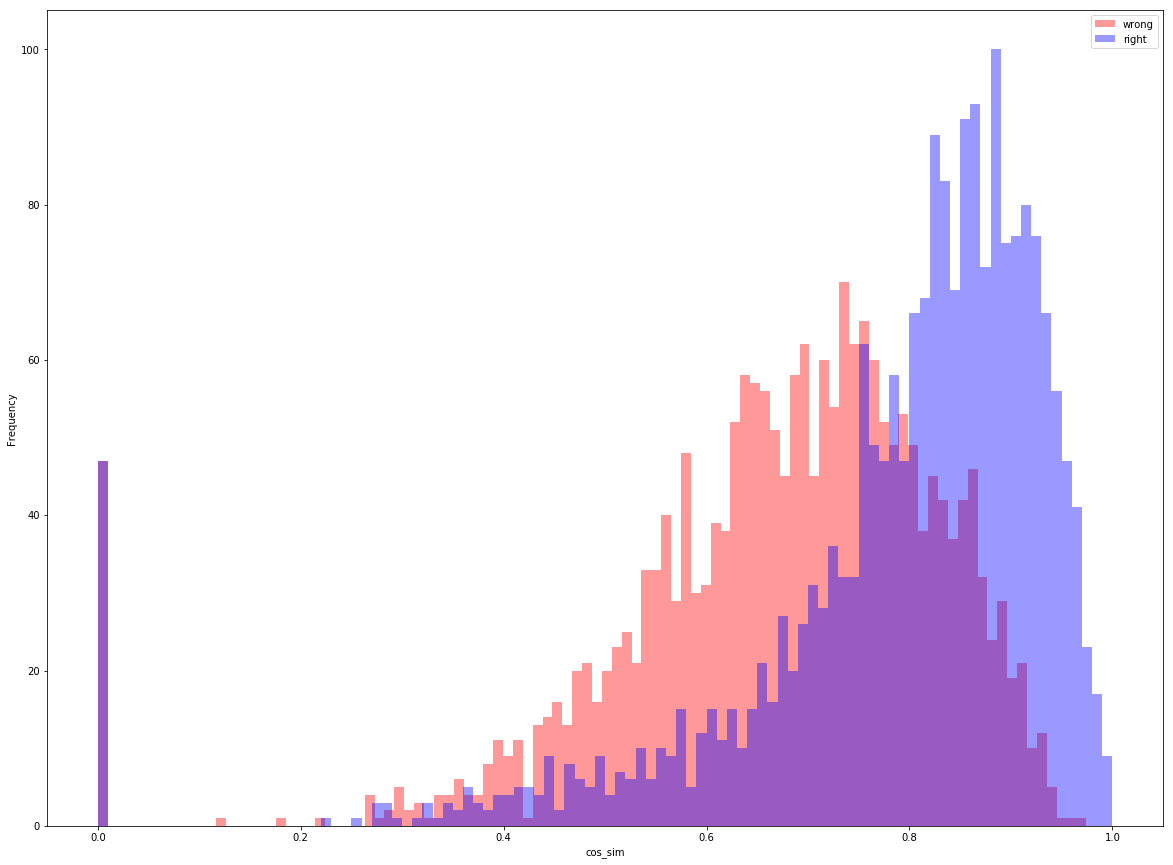

In [140]:
plt.figure(figsize = (20, 15))
sns.distplot(wrong['cos_sim'], kde=False,  bins=100, color="red",  label = 'wrong')

sns.distplot(right['cos_sim'], kde=False,  bins=100, color="blue", label='right')

plt.xlabel('cos_sim')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("cosw2v.pdf")
plt.show()

## TF-IDF

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [46]:
tfidf = TfidfVectorizer().fit(qadata['Question']+ qadata['Answer'])

In [47]:
tfidf.transform([qadata.iat[0,0]]).toarray().sum()

3.6449600492559755

In [48]:
qadata.iat[0,0]

'1) Please describe \n- the size of the organization globally,\n- number of people working at the given site\n- number of people dedicated to the service to Citi'

In [49]:
tfidf.transform([qadata.iat[0,1]]).toarray().sum()

4.5741151190128928

In [50]:
cosine_similarity(tfidf.transform([qadata.iat[4230,0]]).toarray(), tfidf.transform([qadata.iat[4230,1]]).toarray())

array([[ 0.05078947]])

In [51]:
qadata["tf_cos"] = 0.0

In [52]:
for i in range(len(qadata)):
    qadata.iat[i, 3] = cosine_similarity(tfidf.transform([qadata.iat[i,0]]).toarray(), tfidf.transform([qadata.iat[i,1]]).toarray())

In [104]:
right = qadata[qadata["score"] == 1.0]
wrong = qadata[qadata["score"] == 0.0]

In [105]:
right.describe()

,score,tf_cos,bitf_cos
count,2116.0,2116.000000,2116.000000
mean,1.0,0.124426,0.103992
std,0.0,0.150109,0.135799
min,1.0,0.000000,0.000000
25%,1.0,0.000000,0.000000
50%,1.0,0.086496,0.070901
75%,1.0,0.182529,0.143385
max,1.0,1.000000,1.000000


In [106]:
wrong.describe()

,score,tf_cos,bitf_cos
count,2116.0,2116.000000,2116.000000
mean,0.0,0.026006,0.019947
std,0.0,0.034766,0.028065
min,0.0,0.000000,0.000000
25%,0.0,0.000000,0.000000
50%,0.0,0.014261,0.010063
75%,0.0,0.038314,0.028839
max,0.0,0.364142,0.235256


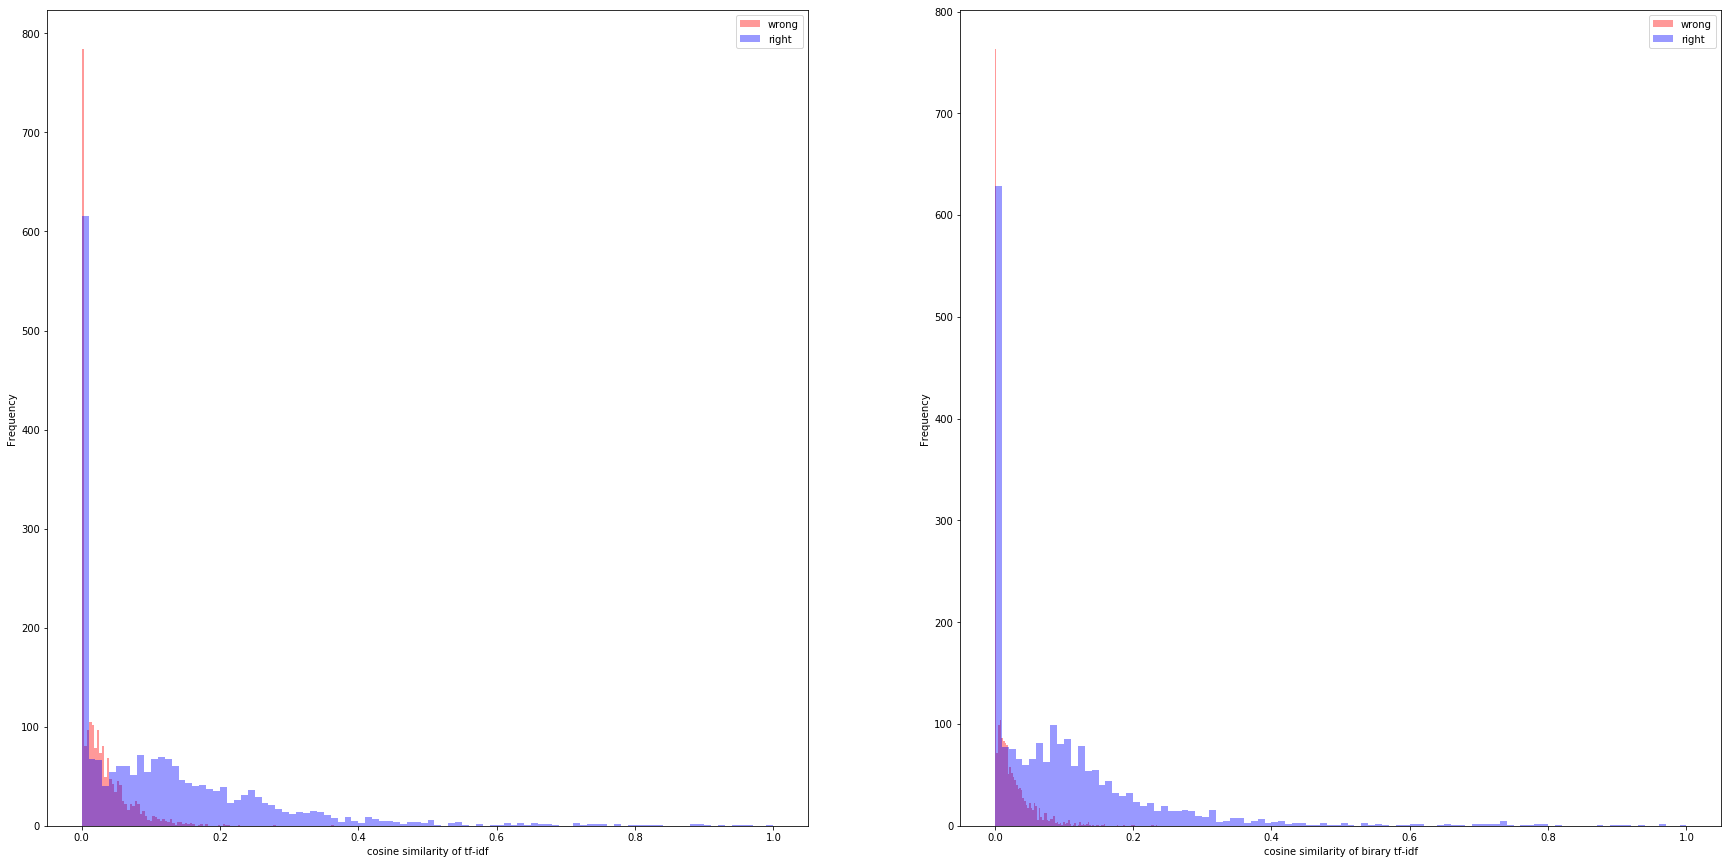

In [118]:
plt.figure(figsize = (30,15))
n_columns = 2
n_rows = 1

plt.subplot(n_rows, n_columns, 1)
sns.distplot(wrong['tf_cos'], kde=False,  bins=100, color="red",  label = 'wrong')

sns.distplot(right['tf_cos'], kde=False,  bins=100, color="blue", label='right')

plt.xlabel('cosine similarity of tf-idf')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(n_rows, n_columns, 2)
sns.distplot(wrong['bitf_cos'], kde=False,  bins=100, color="red",  label = 'wrong')

sns.distplot(right['bitf_cos'], kde=False,  bins=100, color="blue", label='right')

plt.xlabel('cosine similarity of birary tf-idf')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("costf.pdf")
plt.show()

## binary tf-idf

In [119]:
b = TfidfVectorizer(binary=True).fit(qadata['Question']+ qadata['Answer'])

In [120]:
b.transform([qadata.iat[0,0]]).toarray().sum()

3.7382507542731087

In [121]:
b.transform([qadata.iat[0,1]]).toarray().sum()

4.6210160607205122

In [122]:
cosine_similarity(b.transform([qadata.iat[4230,0]]).toarray(), b.transform([qadata.iat[4230,1]]).toarray())

array([[ 0.01479854]])

In [123]:
qadata["bitf_cos"] = 0.0

In [124]:
for i in range(len(qadata)):
    qadata.iat[i, 4] = cosine_similarity(b.transform([qadata.iat[i,0]]).toarray(), b.transform([qadata.iat[i,1]]).toarray())

In [125]:
qadata

,Question,Answer,score,tf_cos,bitf_cos
0,1) Please describe \n- the size of the organiz...,"Clifford Chance employs 6000 people globally, ...",1.0,0.501280,0.386402
1,2) Please provide a clear explanation of what ...,Clifford Chance is a professional legal servic...,1.0,0.150214,0.142820
2,"3) Are this office at 10 UPPER BANK STREET, LO...",Citi data is only handled at the aforementione...,1.0,0.132728,0.111041
3,\n4) Specify quantities that will describe the...,Record quantity is determined by the relations...,1.0,0.025402,0.008785
4,5) If one or more sub-contractors are used in ...,Sub-contractors are not used in conjunction wi...,1.0,0.407989,0.390201
5,1) Describe the flow of data from the time it ...,not applicable,1.0,0.000000,0.000000
6,"a) If data is accessed, describe how it is acc...",a.) Data is accessed using standard tools and ...,1.0,0.385117,0.304614
7,"b) If data is processed, describe the process ...",b.) Data is processed in line with contract sc...,1.0,0.202150,0.204814
8,"c) If data is stored, describe how it is store...",c.) Data is stored on secure servers within a ...,1.0,0.179759,0.090027
9,d) Describe the data disposal process.,d.) Asset and Information Disposal is covered ...,1.0,0.413959,0.295783


In [126]:
right = qadata[qadata["score"] == 1.0]
wrong = qadata[qadata["score"] == 0.0]

In [127]:
right.describe()

,score,tf_cos,bitf_cos
count,2116.0,2116.000000,2116.000000
mean,1.0,0.124426,0.103992
std,0.0,0.150109,0.135799
min,1.0,0.000000,0.000000
25%,1.0,0.000000,0.000000
50%,1.0,0.086496,0.070901
75%,1.0,0.182529,0.143385
max,1.0,1.000000,1.000000


In [128]:
wrong.describe()

,score,tf_cos,bitf_cos
count,2116.0,2116.000000,2116.000000
mean,0.0,0.026006,0.019947
std,0.0,0.034766,0.028065
min,0.0,0.000000,0.000000
25%,0.0,0.000000,0.000000
50%,0.0,0.014261,0.010063
75%,0.0,0.038314,0.028839
max,0.0,0.364142,0.235256


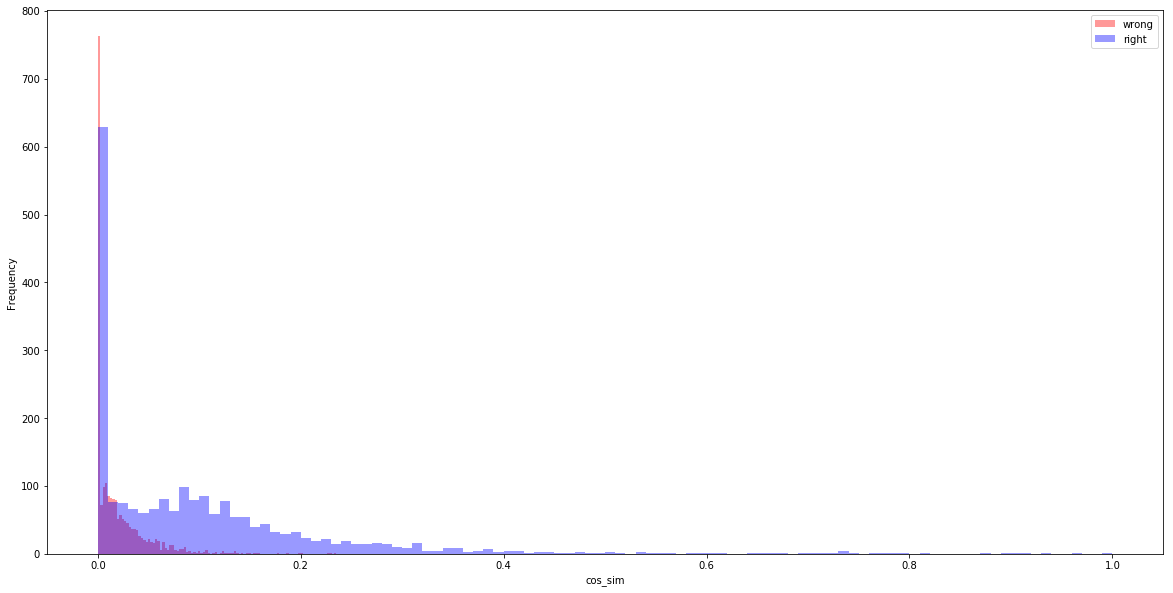

In [67]:
plt.figure(figsize = (20, 10))
sns.distplot(wrong['bitf_cos'], kde=False,  bins=100, color="red",  label = 'wrong')

sns.distplot(right['bitf_cos'], kde=False,  bins=100, color="blue", label='right')

plt.xlabel('cos_sim')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [68]:
#qadata.to_csv("qadata.csv")
#pd.read_csv("qadata.csv")

## language model

In [69]:
import numpy as np
import collections

class Ngram_lm():
    def __init__(self, train, order):
        """
        Create an NGram language model.
        Args:
            train: list of training tokens.
            order: order of the LM.
        """
        self.vocab = set(train)
        self.order = order
        self._counts = collections.defaultdict(float)
        self._norm = collections.defaultdict(float)
        for i in range(self.order, len(train)):
            history = tuple(train[i - self.order + 1: i])
            word = train[i]
            self._counts[(word,) + history] += 1.0
            self._norm[history] += 1.0

    def probability(self, word, *history):
        """
        Args:
            word: the word we need the probability of
            history: words to condition on.
        Returns:
            the probability p(w|history)
        """
        if word not in self.vocab:
            return 0.0
        if self.order > 1:
            sub_history = tuple(history[-(self.order - 1):])
        else:
            sub_history = ()
        norm = self._norm[sub_history]
        if norm == 0:
            return 1.0 / len(self.vocab)
        else:
            return self._counts[((word,) + sub_history)] / norm

class Inter_lm():
    def __init__(self, main, backoff, alpha):
        self.vocab = main.vocab
        self.order = main.order
        self.main = main
        self.backoff = backoff
        self.alpha = alpha
    
    def probability(self, word, *history):
        p = self.alpha * self.main.probability(word, *history) + \
            (1.0 - self.alpha) * self.backoff.probability(word, *history)
        return p

def kl_div(p, q):
    """
    calculate the k-l divergence of the two distribution.
    p,q: the two distributions
    kl: the k-l divergence of the two distributions
    """
    kl = 0
    p[p == 0] = 0.000001
    q[q == 0] = 0.000001
    for i in range(len(p)):
#        if p[i] != 0 and q[i] != 0:
        kl = kl - (p[i] * np.log(q[i] / p[i]))
    #     if kl == 0:
#         kl = -1
    return kl


def lm_vector(sentence, lm):
    """
    input lm & sentence, output vector, no need to control lenth
    lm: the language model to be used to predict
    sentence: the sentence for the language model to predict
    vector: the vector contains the probability from the language model
    """
    hist_len = lm.order - 1
    vector = np.zeros((len(sentence) - hist_len))
    for i in range(hist_len, len(sentence)):
        history = sentence[i - hist_len: i]
        word = sentence[i]
        p = lm.probability(word, *history)
        vector[(i - hist_len)] = p
    return vector

In [70]:
def create_unigram(sentence):
    unigram = Ngram_lm(sentence,1)
    return unigram

In [71]:
def create_bigram(sentence):
    alpha1=0.7
    unigram = Ngram_lm(sentence,1)
    bigram = Ngram_lm(sentence,2)
    bi_unigram=Inter_lm(bigram,unigram,alpha1)
    return bi_unigram

In [72]:
clean_all["kl_lm"] = 0.0

In [73]:
clean_all

,Question,Answer,score,cos_sim,kl_lm
0,"[please, describe, size, organization, globall...","[clifford, chance, employ, people, globally, a...",1.0,0.854894,0.0
1,"[please, provide, clear, explanation, service,...","[clifford, chance, professional, legal, servic...",1.0,0.776172,0.0
2,"[office, upper, bank, street, london, e, jj, u...","[citi, data, handle, aforementioned, site]",1.0,0.933298,0.0
3,"[specify, quantity, describe, number, record, ...","[record, quantity, determine, relationship, le...",1.0,0.825581,0.0
4,"[one, sub, contractor, use, provide, service, ...","[sub, contractor, use, conjunction, service, c...",1.0,0.950958,0.0
5,"[describe, flow, data, time, leaf, citi, delet...",[applicable],1.0,0.878095,0.0
6,"[data, access, describe, access]","[data, access, use, standard, tool, access, gr...",1.0,0.922579,0.0
7,"[b, data, process, describe, process, take, pl...","[b, data, process, line, contract, schedule, a...",1.0,0.752124,0.0
8,"[c, data, store, describe, store, type, medium...","[c, data, store, secure, server, within, data,...",1.0,0.832746,0.0
9,"[describe, data, disposal, process]","[asset, information, disposal, cover, secure, ...",1.0,0.826362,0.0


In [74]:
for i in range(len(clean_all)):
    question = clean_all.iat[i,0]
    answer = clean_all.iat[i,1]
    lm1 = create_unigram(question)
    lm2 = create_unigram(answer)
    #w = q+a
    p = lm_vector(question, lm1)
    q = lm_vector(question, lm2)
    clean_all.iat[i,4] = kl_div(p, q)

In [75]:
clean_all

,Question,Answer,score,cos_sim,kl_lm
0,"[please, describe, size, organization, globall...","[clifford, chance, employ, people, globally, a...",1.0,0.854894,5.285982
1,"[please, provide, clear, explanation, service,...","[clifford, chance, professional, legal, servic...",1.0,0.776172,10.015840
2,"[office, upper, bank, street, london, e, jj, u...","[citi, data, handle, aforementioned, site]",1.0,0.933298,10.666567
3,"[specify, quantity, describe, number, record, ...","[record, quantity, determine, relationship, le...",1.0,0.825581,10.341471
4,"[one, sub, contractor, use, provide, service, ...","[sub, contractor, use, conjunction, service, c...",1.0,0.950958,7.693669
5,"[describe, flow, data, time, leaf, citi, delet...",[applicable],1.0,0.878095,14.394304
6,"[data, access, describe, access]","[data, access, use, standard, tool, access, gr...",1.0,0.922579,5.971332
7,"[b, data, process, describe, process, take, pl...","[b, data, process, line, contract, schedule, a...",1.0,0.752124,6.713709
8,"[c, data, store, describe, store, type, medium...","[c, data, store, secure, server, within, data,...",1.0,0.832746,8.477222
9,"[describe, data, disposal, process]","[asset, information, disposal, cover, secure, ...",1.0,0.826362,5.080876


In [129]:
right = clean_all[clean_all["score"] == 1.0]
wrong = clean_all[clean_all["score"] == 0.0]

In [130]:
clean_all.describe()

,score,cos_sim,kl_lm,kl_bilm
count,4232.000000,4232.000000,4232.000000,4232.000000
mean,0.500000,0.729099,12.513722,116.150025
std,0.500059,0.181422,4.130766,93.638765
min,0.000000,0.000000,-0.026829,-0.173549
25%,0.000000,0.645242,10.390008,60.644444
50%,0.500000,0.764950,12.023751,90.487180
75%,1.000000,0.857018,14.060121,145.861258
max,1.000000,1.000000,58.557448,1211.408114


In [131]:
right.describe()

,score,cos_sim,kl_lm,kl_bilm
count,2116.0,2116.000000,2116.000000,2116.000000
mean,1.0,0.786585,11.269489,107.801013
std,0.0,0.176288,3.962400,89.145929
min,1.0,0.000000,-0.026829,-0.173549
25%,1.0,0.741425,8.922912,52.629757
50%,1.0,0.832291,11.417615,84.205263
75%,1.0,0.895757,13.086661,136.157341
max,1.0,1.000000,40.633441,1211.408114


In [132]:
wrong.describe()

,score,cos_sim,kl_lm,kl_bilm
count,2116.0,2116.000000,2116.000000,2116.000000
mean,0.0,0.671613,13.757954,124.499038
std,0.0,0.167791,3.916148,97.232235
min,0.0,0.000000,5.361571,7.501853
25%,0.0,0.587273,11.618286,62.351392
50%,0.0,0.695907,12.568980,99.168134
75%,0.0,0.784871,15.016660,155.426762
max,0.0,0.974281,58.557448,1211.408114


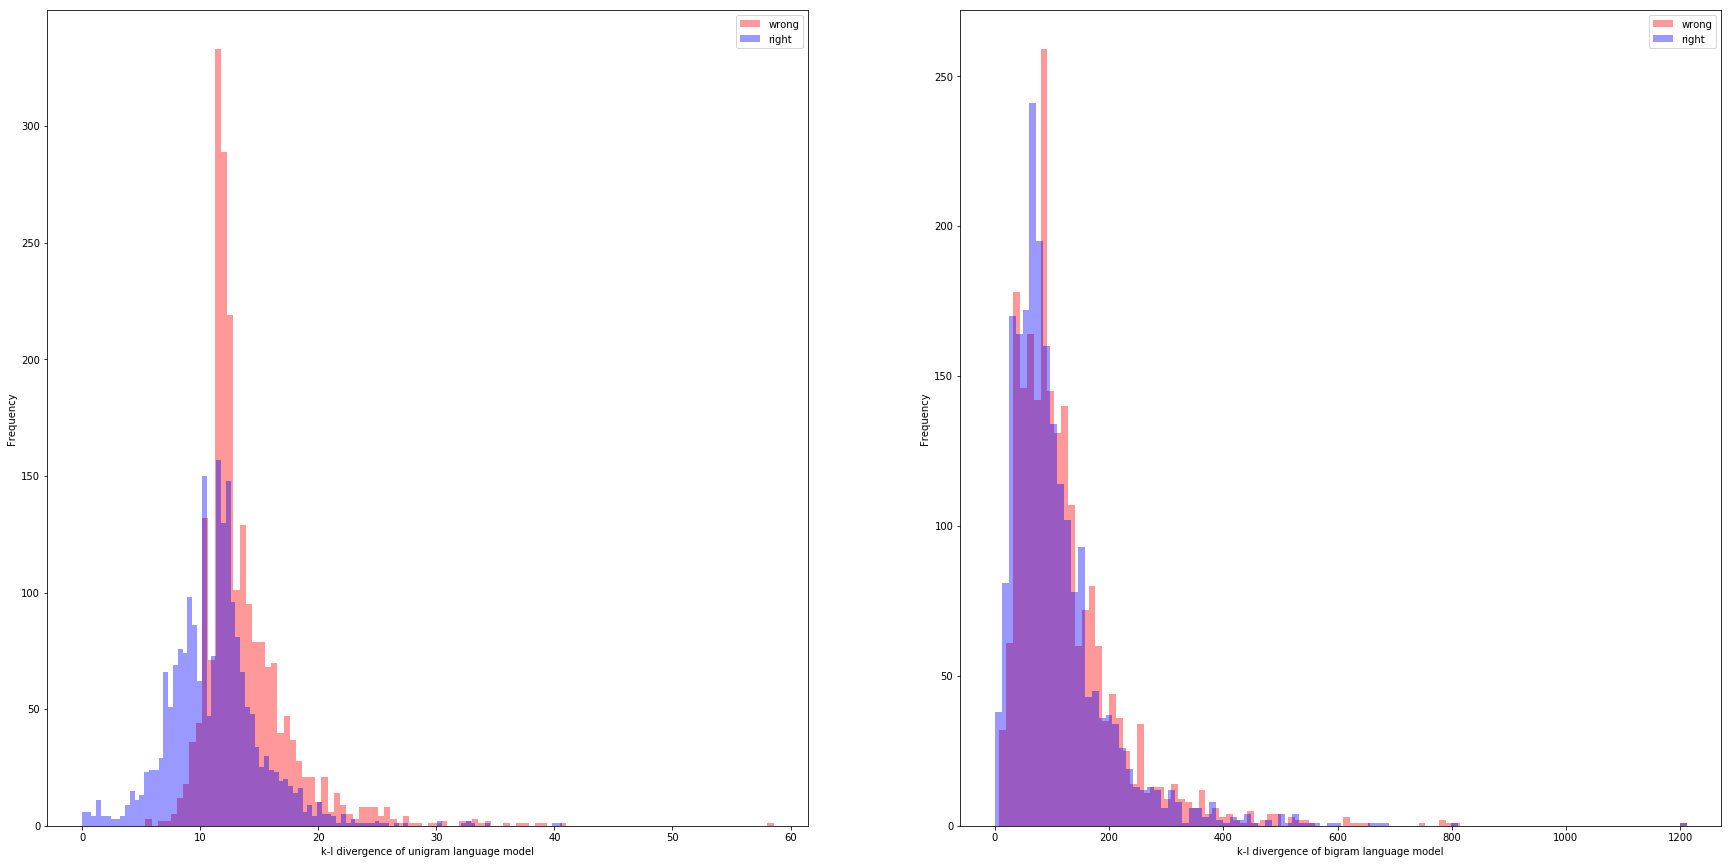

In [134]:
plt.figure(figsize = (30,15))
n_columns = 2
n_rows = 1

plt.subplot(n_rows, n_columns, 1)
sns.distplot(wrong['kl_lm'], kde=False,  bins=100, color="red",  label = 'wrong')

sns.distplot(right['kl_lm'], kde=False,  bins=100, color="blue", label='right')

plt.xlabel('k-l divergence of unigram language model')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(n_rows, n_columns, 2)
sns.distplot(wrong['kl_bilm'], kde=False,  bins=100, color="red",  label = 'wrong')

sns.distplot(right['kl_bilm'], kde=False,  bins=100, color="blue", label='right')

plt.xlabel('k-l divergence of bigram language model')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("kllm.pdf")
plt.show()

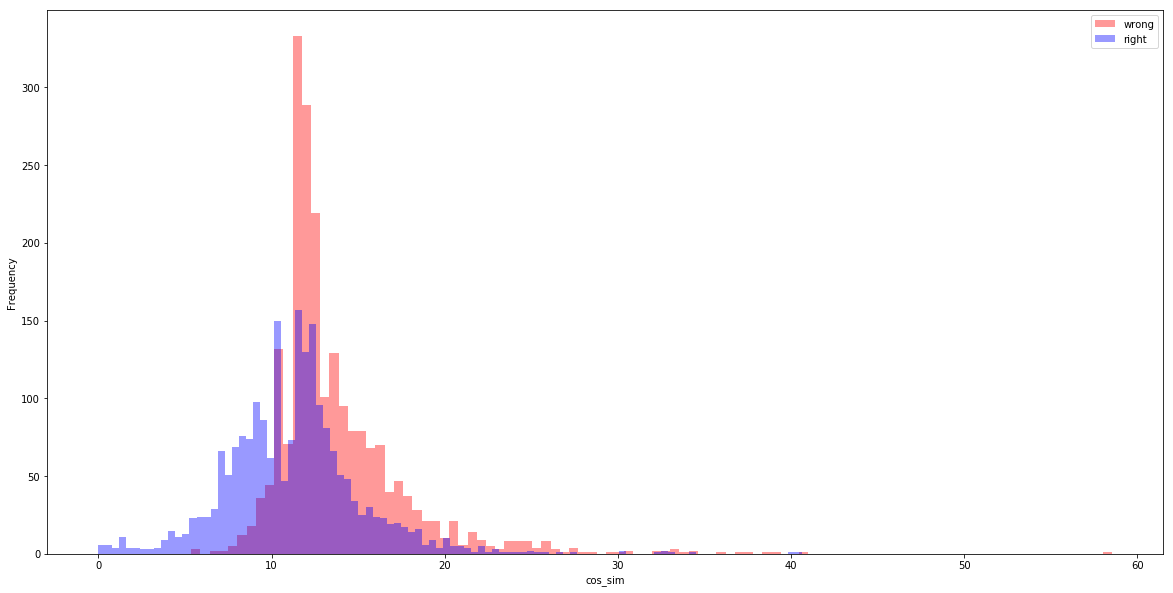

In [133]:
plt.figure(figsize = (20, 10))
sns.distplot(wrong['kl_lm'], kde=False,  bins=100, color="red",  label = 'wrong')

sns.distplot(right['kl_lm'], kde=False,  bins=100, color="blue", label='right')

plt.xlabel('cos_sim')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## bi-gram language model

In [81]:
clean_all["kl_bilm"] = 0.0

In [82]:
clean_all

,Question,Answer,score,cos_sim,kl_lm,kl_bilm
0,"[please, describe, size, organization, globall...","[clifford, chance, employ, people, globally, a...",1.0,0.854894,5.285982,0.0
1,"[please, provide, clear, explanation, service,...","[clifford, chance, professional, legal, servic...",1.0,0.776172,10.015840,0.0
2,"[office, upper, bank, street, london, e, jj, u...","[citi, data, handle, aforementioned, site]",1.0,0.933298,10.666567,0.0
3,"[specify, quantity, describe, number, record, ...","[record, quantity, determine, relationship, le...",1.0,0.825581,10.341471,0.0
4,"[one, sub, contractor, use, provide, service, ...","[sub, contractor, use, conjunction, service, c...",1.0,0.950958,7.693669,0.0
5,"[describe, flow, data, time, leaf, citi, delet...",[applicable],1.0,0.878095,14.394304,0.0
6,"[data, access, describe, access]","[data, access, use, standard, tool, access, gr...",1.0,0.922579,5.971332,0.0
7,"[b, data, process, describe, process, take, pl...","[b, data, process, line, contract, schedule, a...",1.0,0.752124,6.713709,0.0
8,"[c, data, store, describe, store, type, medium...","[c, data, store, secure, server, within, data,...",1.0,0.832746,8.477222,0.0
9,"[describe, data, disposal, process]","[asset, information, disposal, cover, secure, ...",1.0,0.826362,5.080876,0.0


In [83]:
for i in range(len(clean_all)):
    question = clean_all.iat[i,0]
    answer = clean_all.iat[i,1]
    lm1 = create_bigram(question)
    lm2 = create_bigram(answer)
    p = lm_vector(question, lm1)
    q = lm_vector(question, lm2)
    clean_all.iat[i,5] = kl_div(p, q)

In [84]:
clean_all

,Question,Answer,score,cos_sim,kl_lm,kl_bilm
0,"[please, describe, size, organization, globall...","[clifford, chance, employ, people, globally, a...",1.0,0.854894,5.285982,64.202174
1,"[please, provide, clear, explanation, service,...","[clifford, chance, professional, legal, servic...",1.0,0.776172,10.015840,65.480876
2,"[office, upper, bank, street, london, e, jj, u...","[citi, data, handle, aforementioned, site]",1.0,0.933298,10.666567,161.406301
3,"[specify, quantity, describe, number, record, ...","[record, quantity, determine, relationship, le...",1.0,0.825581,10.341471,99.324364
4,"[one, sub, contractor, use, provide, service, ...","[sub, contractor, use, conjunction, service, c...",1.0,0.950958,7.693669,52.343010
5,"[describe, flow, data, time, leaf, citi, delet...",[applicable],1.0,0.878095,14.394304,98.652599
6,"[data, access, describe, access]","[data, access, use, standard, tool, access, gr...",1.0,0.922579,5.971332,13.194141
7,"[b, data, process, describe, process, take, pl...","[b, data, process, line, contract, schedule, a...",1.0,0.752124,6.713709,22.141579
8,"[c, data, store, describe, store, type, medium...","[c, data, store, secure, server, within, data,...",1.0,0.832746,8.477222,26.565757
9,"[describe, data, disposal, process]","[asset, information, disposal, cover, secure, ...",1.0,0.826362,5.080876,13.646755


In [85]:
right = clean_all[clean_all["score"] == 1.0]
wrong = clean_all[clean_all["score"] == 0.0]

In [86]:
clean_all.describe()

,score,cos_sim,kl_lm,kl_bilm
count,4232.000000,4232.000000,4232.000000,4232.000000
mean,0.500000,0.729099,12.513722,116.150025
std,0.500059,0.181422,4.130766,93.638765
min,0.000000,0.000000,-0.026829,-0.173549
25%,0.000000,0.645242,10.390008,60.644444
50%,0.500000,0.764950,12.023751,90.487180
75%,1.000000,0.857018,14.060121,145.861258
max,1.000000,1.000000,58.557448,1211.408114


In [87]:
right.describe()

,score,cos_sim,kl_lm,kl_bilm
count,2116.0,2116.000000,2116.000000,2116.000000
mean,1.0,0.786585,11.269489,107.801013
std,0.0,0.176288,3.962400,89.145929
min,1.0,0.000000,-0.026829,-0.173549
25%,1.0,0.741425,8.922912,52.629757
50%,1.0,0.832291,11.417615,84.205263
75%,1.0,0.895757,13.086661,136.157341
max,1.0,1.000000,40.633441,1211.408114


In [88]:
wrong.describe()

,score,cos_sim,kl_lm,kl_bilm
count,2116.0,2116.000000,2116.000000,2116.000000
mean,0.0,0.671613,13.757954,124.499038
std,0.0,0.167791,3.916148,97.232235
min,0.0,0.000000,5.361571,7.501853
25%,0.0,0.587273,11.618286,62.351392
50%,0.0,0.695907,12.568980,99.168134
75%,0.0,0.784871,15.016660,155.426762
max,0.0,0.974281,58.557448,1211.408114


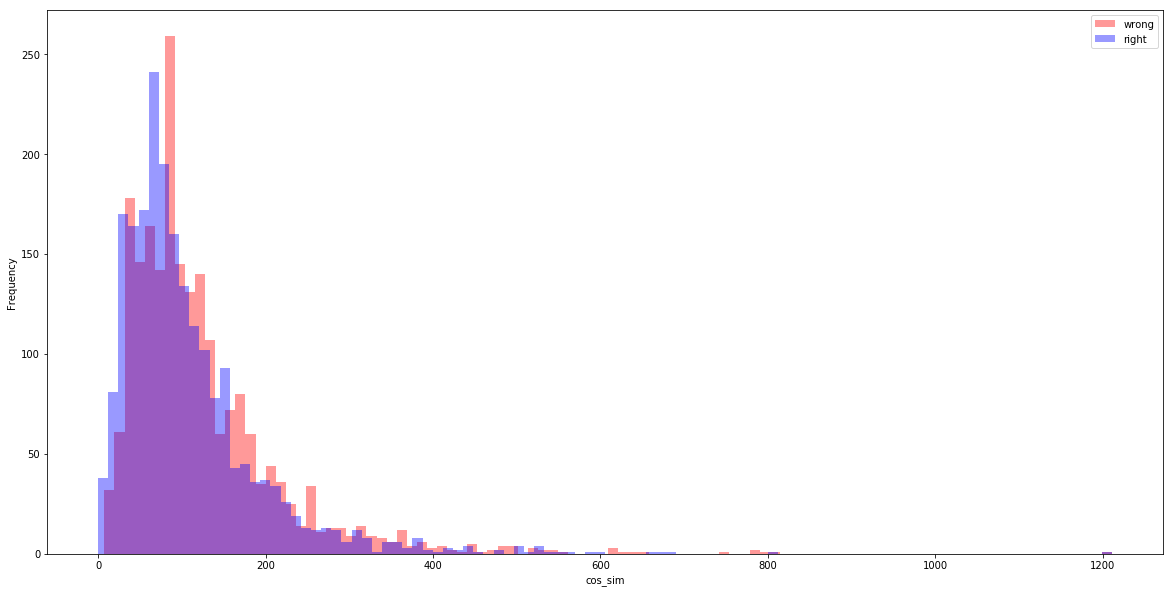

In [89]:
plt.figure(figsize = (20, 10))
sns.distplot(wrong['kl_bilm'], kde=False,  bins=100, color="red",  label = 'wrong')

sns.distplot(right['kl_bilm'], kde=False,  bins=100, color="blue", label='right')

plt.xlabel('cos_sim')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# merge the features into one file

In [90]:
clean_all

,Question,Answer,score,cos_sim,kl_lm,kl_bilm
0,"[please, describe, size, organization, globall...","[clifford, chance, employ, people, globally, a...",1.0,0.854894,5.285982,64.202174
1,"[please, provide, clear, explanation, service,...","[clifford, chance, professional, legal, servic...",1.0,0.776172,10.015840,65.480876
2,"[office, upper, bank, street, london, e, jj, u...","[citi, data, handle, aforementioned, site]",1.0,0.933298,10.666567,161.406301
3,"[specify, quantity, describe, number, record, ...","[record, quantity, determine, relationship, le...",1.0,0.825581,10.341471,99.324364
4,"[one, sub, contractor, use, provide, service, ...","[sub, contractor, use, conjunction, service, c...",1.0,0.950958,7.693669,52.343010
5,"[describe, flow, data, time, leaf, citi, delet...",[applicable],1.0,0.878095,14.394304,98.652599
6,"[data, access, describe, access]","[data, access, use, standard, tool, access, gr...",1.0,0.922579,5.971332,13.194141
7,"[b, data, process, describe, process, take, pl...","[b, data, process, line, contract, schedule, a...",1.0,0.752124,6.713709,22.141579
8,"[c, data, store, describe, store, type, medium...","[c, data, store, secure, server, within, data,...",1.0,0.832746,8.477222,26.565757
9,"[describe, data, disposal, process]","[asset, information, disposal, cover, secure, ...",1.0,0.826362,5.080876,13.646755


In [91]:
qadata

,Question,Answer,score,tf_cos,bitf_cos
0,1) Please describe \n- the size of the organiz...,"Clifford Chance employs 6000 people globally, ...",1.0,0.501280,0.386402
1,2) Please provide a clear explanation of what ...,Clifford Chance is a professional legal servic...,1.0,0.150214,0.142820
2,"3) Are this office at 10 UPPER BANK STREET, LO...",Citi data is only handled at the aforementione...,1.0,0.132728,0.111041
3,\n4) Specify quantities that will describe the...,Record quantity is determined by the relations...,1.0,0.025402,0.008785
4,5) If one or more sub-contractors are used in ...,Sub-contractors are not used in conjunction wi...,1.0,0.407989,0.390201
5,1) Describe the flow of data from the time it ...,not applicable,1.0,0.000000,0.000000
6,"a) If data is accessed, describe how it is acc...",a.) Data is accessed using standard tools and ...,1.0,0.385117,0.304614
7,"b) If data is processed, describe the process ...",b.) Data is processed in line with contract sc...,1.0,0.202150,0.204814
8,"c) If data is stored, describe how it is store...",c.) Data is stored on secure servers within a ...,1.0,0.179759,0.090027
9,d) Describe the data disposal process.,d.) Asset and Information Disposal is covered ...,1.0,0.413959,0.295783


In [92]:
question_cleaned = clean_all['Question']

In [93]:
answer_cleaned = clean_all['Answer']

In [94]:
clean_copy = clean_all.copy()

In [95]:
clean_copy

,Question,Answer,score,cos_sim,kl_lm,kl_bilm
0,"[please, describe, size, organization, globall...","[clifford, chance, employ, people, globally, a...",1.0,0.854894,5.285982,64.202174
1,"[please, provide, clear, explanation, service,...","[clifford, chance, professional, legal, servic...",1.0,0.776172,10.015840,65.480876
2,"[office, upper, bank, street, london, e, jj, u...","[citi, data, handle, aforementioned, site]",1.0,0.933298,10.666567,161.406301
3,"[specify, quantity, describe, number, record, ...","[record, quantity, determine, relationship, le...",1.0,0.825581,10.341471,99.324364
4,"[one, sub, contractor, use, provide, service, ...","[sub, contractor, use, conjunction, service, c...",1.0,0.950958,7.693669,52.343010
5,"[describe, flow, data, time, leaf, citi, delet...",[applicable],1.0,0.878095,14.394304,98.652599
6,"[data, access, describe, access]","[data, access, use, standard, tool, access, gr...",1.0,0.922579,5.971332,13.194141
7,"[b, data, process, describe, process, take, pl...","[b, data, process, line, contract, schedule, a...",1.0,0.752124,6.713709,22.141579
8,"[c, data, store, describe, store, type, medium...","[c, data, store, secure, server, within, data,...",1.0,0.832746,8.477222,26.565757
9,"[describe, data, disposal, process]","[asset, information, disposal, cover, secure, ...",1.0,0.826362,5.080876,13.646755


In [96]:
clean_copy.rename(columns = {'Question':'question_cleaned'}, inplace = True)

In [97]:
clean_copy.rename(columns = {'Answer':'answer_cleaned',}, inplace = True)

In [98]:
clean_copy

,question_cleaned,answer_cleaned,score,cos_sim,kl_lm,kl_bilm
0,"[please, describe, size, organization, globall...","[clifford, chance, employ, people, globally, a...",1.0,0.854894,5.285982,64.202174
1,"[please, provide, clear, explanation, service,...","[clifford, chance, professional, legal, servic...",1.0,0.776172,10.015840,65.480876
2,"[office, upper, bank, street, london, e, jj, u...","[citi, data, handle, aforementioned, site]",1.0,0.933298,10.666567,161.406301
3,"[specify, quantity, describe, number, record, ...","[record, quantity, determine, relationship, le...",1.0,0.825581,10.341471,99.324364
4,"[one, sub, contractor, use, provide, service, ...","[sub, contractor, use, conjunction, service, c...",1.0,0.950958,7.693669,52.343010
5,"[describe, flow, data, time, leaf, citi, delet...",[applicable],1.0,0.878095,14.394304,98.652599
6,"[data, access, describe, access]","[data, access, use, standard, tool, access, gr...",1.0,0.922579,5.971332,13.194141
7,"[b, data, process, describe, process, take, pl...","[b, data, process, line, contract, schedule, a...",1.0,0.752124,6.713709,22.141579
8,"[c, data, store, describe, store, type, medium...","[c, data, store, secure, server, within, data,...",1.0,0.832746,8.477222,26.565757
9,"[describe, data, disposal, process]","[asset, information, disposal, cover, secure, ...",1.0,0.826362,5.080876,13.646755


In [99]:
qadata

,Question,Answer,score,tf_cos,bitf_cos
0,1) Please describe \n- the size of the organiz...,"Clifford Chance employs 6000 people globally, ...",1.0,0.501280,0.386402
1,2) Please provide a clear explanation of what ...,Clifford Chance is a professional legal servic...,1.0,0.150214,0.142820
2,"3) Are this office at 10 UPPER BANK STREET, LO...",Citi data is only handled at the aforementione...,1.0,0.132728,0.111041
3,\n4) Specify quantities that will describe the...,Record quantity is determined by the relations...,1.0,0.025402,0.008785
4,5) If one or more sub-contractors are used in ...,Sub-contractors are not used in conjunction wi...,1.0,0.407989,0.390201
5,1) Describe the flow of data from the time it ...,not applicable,1.0,0.000000,0.000000
6,"a) If data is accessed, describe how it is acc...",a.) Data is accessed using standard tools and ...,1.0,0.385117,0.304614
7,"b) If data is processed, describe the process ...",b.) Data is processed in line with contract sc...,1.0,0.202150,0.204814
8,"c) If data is stored, describe how it is store...",c.) Data is stored on secure servers within a ...,1.0,0.179759,0.090027
9,d) Describe the data disposal process.,d.) Asset and Information Disposal is covered ...,1.0,0.413959,0.295783


In [100]:
merged = pd.concat([clean_copy, qadata], axis = 1)#the final merged dataframe

In [141]:
merged

,question_cleaned,answer_cleaned,score,cos_sim,kl_lm,kl_bilm,Question,Answer,score,tf_cos,bitf_cos
0,"[please, describe, size, organization, globall...","[clifford, chance, employ, people, globally, a...",1.0,0.854894,5.285982,64.202174,1) Please describe \n- the size of the organiz...,"Clifford Chance employs 6000 people globally, ...",1.0,0.501280,0.386402
1,"[please, provide, clear, explanation, service,...","[clifford, chance, professional, legal, servic...",1.0,0.776172,10.015840,65.480876,2) Please provide a clear explanation of what ...,Clifford Chance is a professional legal servic...,1.0,0.150214,0.142820
2,"[office, upper, bank, street, london, e, jj, u...","[citi, data, handle, aforementioned, site]",1.0,0.933298,10.666567,161.406301,"3) Are this office at 10 UPPER BANK STREET, LO...",Citi data is only handled at the aforementione...,1.0,0.132728,0.111041
3,"[specify, quantity, describe, number, record, ...","[record, quantity, determine, relationship, le...",1.0,0.825581,10.341471,99.324364,\n4) Specify quantities that will describe the...,Record quantity is determined by the relations...,1.0,0.025402,0.008785
4,"[one, sub, contractor, use, provide, service, ...","[sub, contractor, use, conjunction, service, c...",1.0,0.950958,7.693669,52.343010,5) If one or more sub-contractors are used in ...,Sub-contractors are not used in conjunction wi...,1.0,0.407989,0.390201
5,"[describe, flow, data, time, leaf, citi, delet...",[applicable],1.0,0.878095,14.394304,98.652599,1) Describe the flow of data from the time it ...,not applicable,1.0,0.000000,0.000000
6,"[data, access, describe, access]","[data, access, use, standard, tool, access, gr...",1.0,0.922579,5.971332,13.194141,"a) If data is accessed, describe how it is acc...",a.) Data is accessed using standard tools and ...,1.0,0.385117,0.304614
7,"[b, data, process, describe, process, take, pl...","[b, data, process, line, contract, schedule, a...",1.0,0.752124,6.713709,22.141579,"b) If data is processed, describe the process ...",b.) Data is processed in line with contract sc...,1.0,0.202150,0.204814
8,"[c, data, store, describe, store, type, medium...","[c, data, store, secure, server, within, data,...",1.0,0.832746,8.477222,26.565757,"c) If data is stored, describe how it is store...",c.) Data is stored on secure servers within a ...,1.0,0.179759,0.090027
9,"[describe, data, disposal, process]","[asset, information, disposal, cover, secure, ...",1.0,0.826362,5.080876,13.646755,d) Describe the data disposal process.,d.) Asset and Information Disposal is covered ...,1.0,0.413959,0.295783


In [102]:
merged.to_csv('features_builtagain.csv')